# 勞工生活及就業狀況調查

## 資料來源：政府資料開放平台

 # （更新）延續上份作業，這份的目標是看為什麼收入低於兩萬者[很滿意]度會高，但最後沒找到

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### 整體工作情形滿意度

In [2]:
df = pd.read_csv('https://apiservice.mol.gov.tw/OdService/download/A17000000J-020078-LPO')

In [3]:
df.head()

,統計項目別,細項,樣本數（人）,很滿意（%）,滿意（%）,普通（%）,不滿意（%）,很不滿意（%）
0,性別,男,1891,12.5,54.0,29.9,3.2,0.5
1,性別,女,2191,11.8,57.2,28.0,2.6,0.4
2,年齡,15-24歲,246,15.7,49.8,33.1,1.4,-
3,年齡,25-44歲,2573,11.0,55.5,29.5,3.5,0.5
4,年齡,25-34歲,1348,10.5,54.6,30.8,3.4,0.7


# 看一下總共統計了哪些項目

In [4]:
print(df.統計項目別, df.細項)

0       性別
1       性別
2       年齡
3       年齡
4       年齡
5       年齡
6       年齡
7       年齡
8       年齡
9       年齡
10    教育程度
11    教育程度
12    教育程度
13    教育程度
14    每月收入
15    每月收入
16    每月收入
17    每月收入
18    每月收入
19    每月收入
20    每月收入
21    每月收入
22    每月收入
23      地區
24      地區
25      地區
26      地區
27      規模
28      規模
29      規模
      ... 
43      行業
44      行業
45      行業
46      行業
47      行業
48      行業
49      行業
50      行業
51      行業
52      行業
53      行業
54      行業
55      行業
56      職業
57      職業
58      職業
59      職業
60      職業
61      職業
62      職業
63      職業
64      職業
65    工作年資
66    工作年資
67    工作年資
68    工作年資
69    工作年資
70    工作年資
71    工作年資
72    工作年資
Name: 統計項目別, Length: 73, dtype: object 0                   男
1                   女
2              15-24歲
3              25-44歲
4              25-34歲
5              35-44歲
6              45-64歲
7              45-54歲
8              55-64歲
9               65歲以上
10              國中及以下
11              高中（職）
12              專科及大學
13  

In [6]:
df = df.rename(columns={'很滿意（%）':'很滿意'})

In [7]:
df_sort = df.sort_values('很滿意', ascending = False)

# 看一下收入對滿意度的影響

In [ ]:
dfm = df_sort[df_sort.統計項目別=='每月收入']

In [ ]:
dfm

In [ ]:
len(dfm)

# 因為資料型態的關係無法做相關分析，因此一項一項拉出來看

# 先假設收入低但很滿意跟年紀較輕有關

# 再看看是否因年資低

In [8]:
dfb = df_sort[df_sort.統計項目別=='工作年資']

In [9]:
dfb

,統計項目別,細項,樣本數（人）,很滿意,滿意（%）,普通（%）,不滿意（%）,很不滿意（%）
72,工作年資,30年以上,512,13.6,57.4,26.9,1.8,0.3
65,工作年資,未滿2年,201,12.7,54.3,30.6,2.4,-
70,工作年資,20年-未滿25年,524,12.5,57.8,26.1,3.2,0.4
67,工作年資,5年-未滿10年,716,12.2,52.8,30.3,4.1,0.6
71,工作年資,25年-未滿30年,377,12.1,57.9,28.4,1.2,0.4
68,工作年資,10年-未滿15年,711,11.7,55.9,28.7,3.4,0.3
69,工作年資,15年-未滿20年,610,11.5,57.4,28.0,2.6,0.6
66,工作年資,2年-未滿5年,431,11.3,52.9,32.5,2.8,0.6


# 年資對工作滿意的影響似乎不大，再看教育程度

In [10]:
dfc = df_sort[df_sort.統計項目別=='教育程度']

In [11]:
dfc

,統計項目別,細項,樣本數（人）,很滿意,滿意（%）,普通（%）,不滿意（%）,很不滿意（%）
10,教育程度,國中及以下,315,14.8,54.7,28.8,1.7,-
13,教育程度,碩士及以上,330,12.4,60.0,25.4,2,0.2
11,教育程度,高中（職）,1222,12.3,56.6,28.3,2.3,0.6
12,教育程度,專科及大學,2215,11.6,54.8,29.7,3.5,0.4


# 覺得沒什麼意義，想畫直方圖來比較分配型態是否一致，但不知如何指定x與y的呈現

ValueError: shape mismatch: objects cannot be broadcast to a single shape

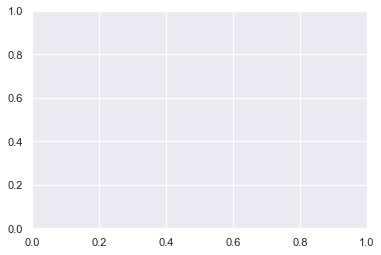

In [13]:
x = dfc.統計項目別=='每月收入'
y = dfc=='很滿意'
plt.bar(x, y)